<h1 align="center">
Data Report
</h1>



                                         Credit Derivatives, US Housing Prices 
                                    Credit Rating Agencies, and Public Equity ETFS: 

                                                  An Empirical Study




                                                     Daniel Lynch
                                                        dpl296



                                   Presented to The Leonard N. Stern School of Business 
                                             in partial fulfillment of the 
                                        requirements of Undergrad: ECON-UB.0232









                                                  New York University
                                                      New York, NY

                                                        May 2017
                                                         
                                                         
                                                      Daniel Csaba


<h3 align='center'>
Abstract
</h3>

Abstract here

In [227]:
#Import Packages

import sys                             # system module 
import pandas as pd                    # data package
import matplotlib.pyplot as plt        # graphics module  
import datetime as dt                  # date and time module
import numpy as np                     # foundation for Pandas 
import statsmodels.formula.api as smf  #stat module for regression

import os                       # operating system tools (check files)
import requests, io             # internet and input tools  
import zipfile as zf            # zip file tools 
import shutil                   # file management tools 

%matplotlib inline                     

# check versions
print('Python version:', sys.version)
print('Pandas version: ', pd.__version__)
print('Today: ', dt.date.today())

Python version: 3.5.2 |Anaconda 4.2.0 (64-bit)| (default, Jul  5 2016, 11:41:13) [MSC v.1900 64 bit (AMD64)]
Pandas version:  0.18.1
Today:  2017-05-12


<h3 align="center">
Introduction
</h3>

   American households experienced a crippling loss of wealth totaling over 16 trillion in the aftermath of the financial crisis beginning in 2007 . The median net worth of families fell from 126,400 in 2007 to $77,300 in 2010, which is near where American families were in 1992 . The national GDP tumbled significantly below its historical output growth rate, the unemployment rate surged, and banks watched their balance sheets collapse as collateralized debt obligations (CDOs) and other mortgage-exposed securities became toxic. How could the best and brightest minds on Wall Street have missed this? How did we get here? 

   First, a bubble in real estate prices formed. The euphoria of ever-rising prices and the temporary ability to default and sell at a capital gain lead to an unsustainable frenzy of demand. Second, rising home prices coincided with a sharp decline in loan quality. Non-agency subprime and Alt-A adjustable-rate mortgages were originated en masse to meet the insatiable demand for the burgeoning derivative market. Third, the systematic credit risk of these loans was grossly underestimated for the event of a fall in home prices, an increase in defaults, or high asset correlation. The loans were passed along rapidly through several cycles of securitization and remained off-balance sheet and hidden from public scrutiny, leading to a dizzying web of highly levered CDOs, credit default swaps, liquidity puts, and other rated structured products. 


<h3 align="center">
Overview of Housing Prices
</h3>

The gross domestic product of the United States of America has, since the birth of reliable data collection, grown in real terms over the course of nearly any two points in time. Through various business and economic cycles, our economy grows in the long run. While real GDP may serve to be the most synonymous with our “economy” or “economic growth”, other important components of a nation’s economic position are the credibility and stability of the Central Bank’s monetary policy, and home prices.  GDP growth in the long run is a driver of, and correlated to housing prices. Similarly, low interest rates generally increase demand for housing, ceteris paribus. 

This is empirically shown in another model widely used to analyze and model the housing market: the user-cost model.  Generally, it follows that with lower interest rates, it is cheaper to borrow capital and therefore relatively cheaper buy a house, yielding growth in demand which drives market prices higher. For a detailed analysis, see Mayer and Hubbard’s House Prices, Interest Rates, and the Mortgage Market Meltdown (2009). Mayer and Hubbard, continuing the work of Himmelberg et al. (2005) and Sinai (2007), explain that there is a:

"Large and statistically significant relationship between the user cost—the after-tax cost of owning a home—and the cross-sectional variation in the price/rent ratio across United States MSAs. … Regressions show that a one percent change in the user cost results in a 0.62 to 0.85 percent change in house prices. This elasticity suggests that changes in interest rates have played a major role in the recent United States housing boom (and bust). But we also note that there is still excess volatility of the house price-rent ratio that is due to predominantly national factors."

The housing market has been studied by researchers in the fields of academic finance and economics alike. Some models, including the user-cost, are intuitive and simple. Work by others, like that by Giglio et al. mentioned later, is more theoretical and mathematical. For the purpose of this research, I look at housing prices in a straightforward manner. 

The market for homes finds its equilibrium in a manner not unlike any other supply and demand economic model. However, the quantity supplied of houses is, at any point, a fixed or stock variable. Supply can only increase over a period of time; intuitively, it takes time for a supply-altering quantity of homes to be constructed and ready for sale. Additionally, people do not generally buy and sell houses every day, week, or month, and the selling process can take months, leaving the market relatively illiquid. This keeps the used-home stock relatively fixed as well. This extremely long-term mental horizon prevents people from needing to consider their home to be an active investment, at all.  

People do, however, tend to exhibit a reaction to recent price movements when making the decision to sell or buy another property.  This is especially true for second and third mortgages. It is reasonable to believe, therefore, that even a brief period of excess demand in the housing market could cause a material, abnormal, and unsustainable rise in prices. The nature of this market, perhaps even more than others with delayed supply growth, leaves it susceptible to ‘irrational exuberance’ , or a bubble. 


<h3 align="center">
Case-Shiller U.S. National HPI - The Bubble
</h3>

#### Defining the Bubble

A bubble in asset pricing is defined as, “rapid escalation of asset prices… unwarranted by the fundamentals of the asset and driven by exuberant market behavior.”  Even an untrained eye can recognize the unnaturally large appreciation in housing prices in the early 2000s. Once homeowners (and financial institutions alike) began to complacently think that prices would keep rising, they were attracted to the opportunity to take multiple mortgages. Americans were assured by the idea that if they failed to meet their payments on a second or third home, they could simply sell their property at a capital gain and even end up making money on the deal. The bank would take the remaining value out of the collateral (also at a gain), and sell it again in the market. It is important to note that some academics, including Giglio et al. (2014), have attempted to empirical prove that infinitely lived bubbles do not exist. They, 

"Test for the existence of infinitely-lived bubbles in housing markets by directly measuring failures of the pricing condition requiring the present value of infinite maturity payments to be zero. … The price difference between long-maturity leaseholds and freeholds reflects the present value of the freehold after leasehold expiry, thus directly measuring the no-bubble condition. We find no evidence of infinitely-lived bubbles."

However, rather than weighing in on if there was a bubble, I continue under the generally-accepted theoretical framework that there was a bubble. I focus on when it started, deviations from what correlated underlying macroeconomic factors could have indicated it, and how we could have seen the collapse coming. For the purpose of this research, I assert that a bubble has formed when an asset’s market price surges more than 15% above its historical “fundamental” value.

This fundamental value, of the housing market is relatively easily established. In the long run, and after adjusting for inflation, real home prices appreciate very little, and very slowly.  Rather than use that growth rate, certain economists prefer to put nearly all growth (GDP and home prices alike) at the “long-run natural rate of interest”, which is mathematically denotated as r^*. 
Lansing writes in his 2016 FRBSF Economic Letter Projecting the Long-Run Natural Rate of Interest:
The “natural” rate of interest, also known as r* (r-star), is the inflation-adjusted interest rate that is consistent with full use of economic resources and steady inflation near the Fed’s target level. The natural rate is an important benchmark for monetary policy because it determines the real interest rate that policymakers should aim for once temporary shocks to the economy have dissipated and the Fed’s macroeconomic targets have been achieved (Hamilton et al. 2015). Over the past three decades, empirical estimates of r-star track reasonably well with the four-quarter growth rate of potential GDP, as estimated by the U.S. Congressional Budget Office. 

Thinking now of this r^* as the real rate of sustainable long-term growth for the GDP, you can reasonably apply that line of analysis to the housing market, because of the isolated correlation between GDP and the HPI. 

Perhaps, then, the most effective way to argue the presence of a bubble would be to wave a red flag at instances when home prices deviate markedly (for this model, +15%) from the underlying economic growth factors that correlate highly according to pre-bubble historical data. Said differently, home prices can rise at practically any rate, as long as their correlated variables remain in the range. Therefore, I suggest that without any real, organic, and substantial economic growth, the difference witnessed between market prices and “fundamental” value of homes in the early 2000s does, in fact, empirically constitute a bubble.

In [234]:
cs_hpi = 'C:/Users/Daniel Lynch/Desktop/HPI.xlsx'
hpi = df_hpi = pd.read_excel(cs_hpi)

hpi.head()

,Date,CS HPI
0,1975-01-01,25.25
1,1975-02-01,25.29
2,1975-03-01,25.36
3,1975-04-01,25.40
4,1975-05-01,25.48


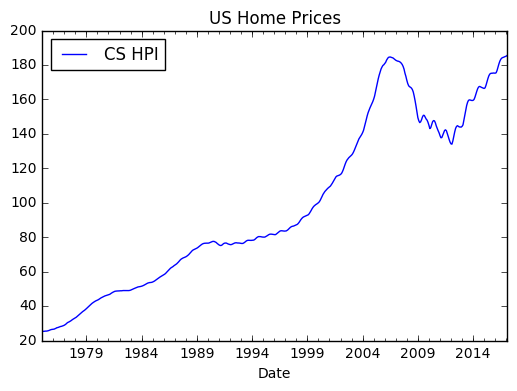

In [162]:
hpi.plot(x='Date',
        title='US Home Prices')

In [43]:
hpi.shape

(506, 2)

#### Here are some graphs that show economic variables often correlated to HPI

Respectively: GDP, Federal Funds Rate, Real Disposable Income, Personal Savings Rate, and S&P500.

In [203]:
GDP_Data = 'C:/Users/Daniel Lynch/Desktop/GDP.xlsx'
GDP = df_GDP = pd.read_excel(GDP_Data)

GDP.head()

,Date,Real US HPI,Real GDP
0,1953-03-01,134.37,2.57
1,1953-06-01,133.78,2.59
2,1953-09-01,133.80,2.58
3,1953-12-01,133.85,2.54
4,1954-03-01,133.90,2.53


In [233]:
GDP.corr('pearson')

,Real US HPI,Real GDP
Real US HPI,1.000000,0.233959
Real GDP,0.233959,1.000000


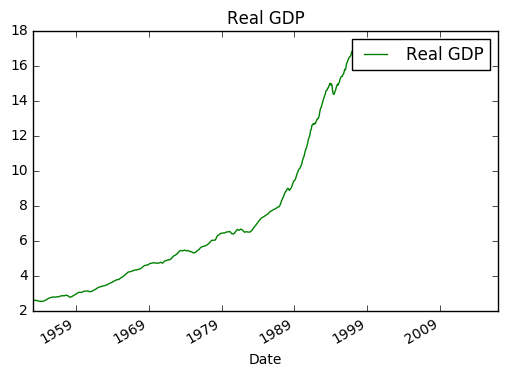

In [214]:
GDP.plot(x='Date',y='Real GDP', secondary_y='Real US HPI', legend='best',
        kind='line',                 # line plot
        color='green',   # line color
        title='Real GDP')

The Real US HPI, here, is adjusted to March 2017 Dollars and the GDP is in Trillions of USD.

In [ ]:
economy.plot(x='Month',y='Federal Funds Rate', legend='best',
        kind='line',                 # line plot
        color='blue',   # line color
        title='FFR')

In [211]:
econ_data = 'C:/Users/Daniel Lynch/Desktop/Economic Data.xlsx'
economy = df_economy = pd.read_excel(econ_data)

economy.head()

,Month,CS HPI (NSA),Federal Funds Rate,S&P 500,Real Disposable Income,Personal Savings Rate (%)
0,1987-01-01,63.75,6.43,264.5,5759.2,0.091
1,1987-02-01,64.15,6.10,280.9,5789.9,0.079
2,1987-03-01,64.49,6.13,292.5,5796.1,0.079
3,1987-04-01,64.99,6.37,289.3,5577.4,0.038
4,1987-05-01,65.57,6.85,289.1,5803.3,0.075


In [232]:
economy.corr('pearson')

,CS HPI (NSA),Federal Funds Rate,S&P 500,Real Disposable Income,Personal Savings Rate (%)
CS HPI (NSA),1.000000,-0.674267,0.828435,0.934909,-0.617240
Federal Funds Rate,-0.674267,1.000000,-0.634888,-0.811047,0.215350
S&P 500,0.828435,-0.634888,1.000000,0.904868,-0.556593
Real Disposable Income,0.934909,-0.811047,0.904868,1.000000,-0.500828
Personal Savings Rate (%),-0.617240,0.215350,-0.556593,-0.500828,1.000000


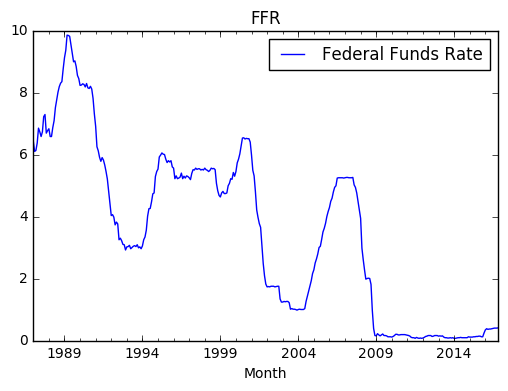

In [212]:
economy.plot(x='Month',y='Federal Funds Rate', legend='best',
        kind='line',                 # line plot
        color='blue',   # line color
        title='FFR')

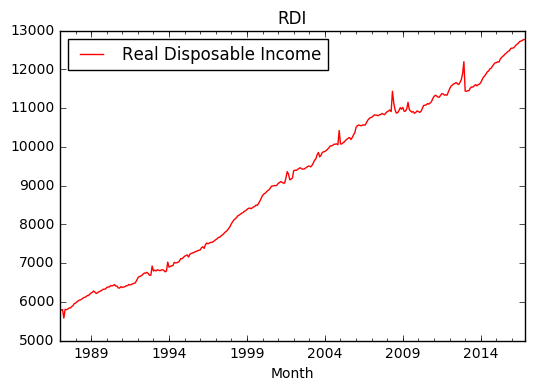

In [219]:
economy.plot(x='Month',y='Real Disposable Income', legend='best',
        kind='line',                 # line plot
        color='red',   # line color
        title='RDI')

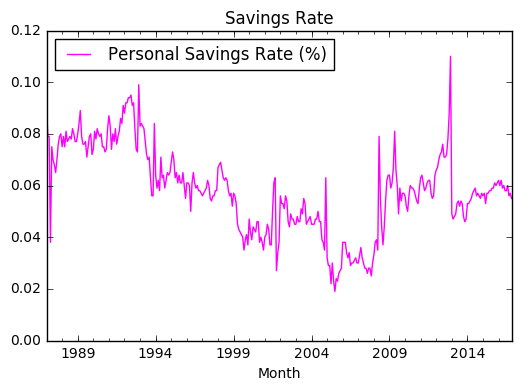

In [215]:
economy.plot(x='Month',y='Personal Savings Rate (%)', legend='best',
        kind='line',                 # line plot
        color='magenta',   # line color
        title='Savings Rate')

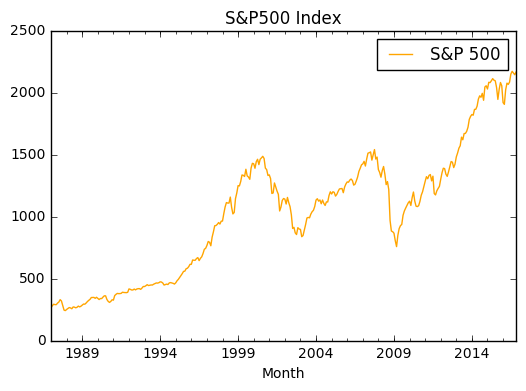

In [216]:
economy.plot(x='Month',y='S&P 500', legend='best',
        kind='line',                 # line plot
        color='orange',   # line color
        title='S&P500 Index')

#### Housing-Specific Factors

In addition to the macroeconomic data that could drive house prices, there are interesting correlations in more housing-specific categories: General Conforming Loan Limit (Thousands), Mortgage Origination (Trillions), and Unemployment (%). 

In [235]:
housing_info = 'C:/Users/Daniel Lynch/Desktop/House Specific.xlsx'
houses = df_houses = pd.read_excel(housing_info)

houses.head()

,Year,Price (March 2017 Dollars),General Conforming Loan Limit Thousands,Mortgage Origination (Trillions),Unemployment Rate
0,1980-12-01,131.38,202.30,0.89367,7.6
1,1981-12-01,130.63,203.15,1.01986,7.0
2,1982-12-01,130.43,203.15,0.77312,6.2
3,1983-12-01,129.51,203.15,0.63943,5.6
4,1984-12-01,128.39,207.00,0.78533,5.5


In [237]:
houses.corr('pearson')

,Price (March 2017 Dollars),General Conforming Loan Limit Thousands,Mortgage Origination (Trillions),Unemployment Rate
Price (March 2017 Dollars),1.000000,0.655201,0.829581,-0.193419
General Conforming Loan Limit Thousands,0.655201,1.000000,0.448837,0.420051
Mortgage Origination (Trillions),0.829581,0.448837,1.000000,-0.130261
Unemployment Rate,-0.193419,0.420051,-0.130261,1.000000


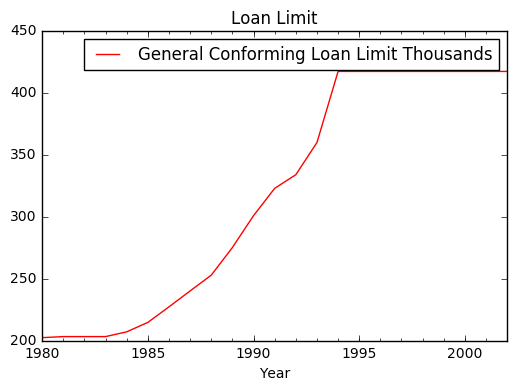

In [239]:
houses.plot(x='Year',y='General Conforming Loan Limit Thousands', legend='best',
        kind='line',                 # line plot
        color='red',   # line color
        title='Loan Limit')

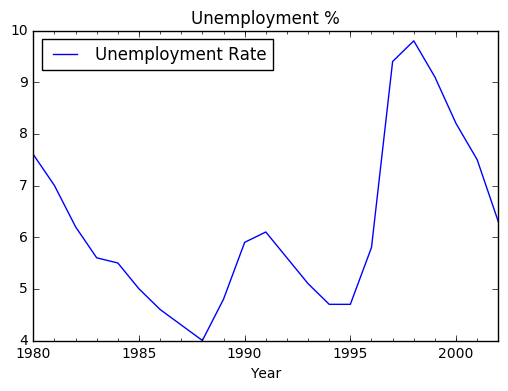

In [241]:
houses.plot(x='Year',y='Unemployment Rate', legend='best',
        kind='line',                 # line plot
        color='blue',   # line color
        title='Unemployment %')

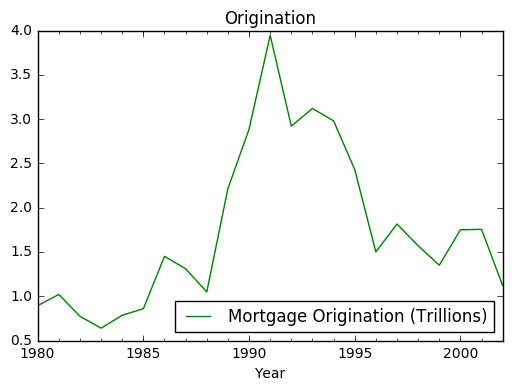

In [244]:
houses.plot(x='Year',y='Mortgage Origination (Trillions)', legend='best',
        kind='line',                 # line plot
        color='green',   # line color
        title='Origination')

<h3 align="center">
Securitization
</h3>

Why is this approach to asset valuation potentially applicable or important? As I will propose later, if a bubble-indicating model, like this one, had been used (or we had just kept our eyes open), and certain defensive regulatory decisions had been put in place that treated home prices as volatile or “due for a pullback”, the financial system of the United States could have possibly avoided hundreds of billions of dollars of write-downs. This holds because Wall Street, and Main Street alike, made a large-scale error in assuming that prices would simply continue to rise indefinitely. 

The United States housing market experienced a period of radical change from the 1970s until its dramatic collapse between 2006 and 2010. The rapid growth of securitization seen in the early 2000s drastically altered the lending landscape more significantly than any development in the majority of the decades prior. Historically, lending was a more local ordeal than the system that we know today. A family would decide to become homeowners, shop around town with a broker, and apply for a loan from a local bank branch. The bank would then hold a portfolio of these mortgages; gradually receiving amortized payments over the thirty-year duration of the loan. Banks had a stake in their community, knew their clients, and had a genuine interest in managing their risk exposure in order to stay solvent. 

That changed entirely after the securitization boom. In the wake of the Great Depression, the Federal Housing Administration (FHA) was created as part of The New Deal. Shortly after the FHA, the government-sponsored corporation Fannie Mae was established in order to inject liquidity into the mortgage market. Later, in the 1960s, Fannie Mae was broken into two entities: Ginnie Mae, which exclusively insures FHA and other agency loans, and today’s Fannie Mae, which was eventually granted the ability to deal in the private mortgage market. Soon after, Fannie Mae sold its first mortgage-backed security.  For a more in-depth history of MBS securities see Cowan (2003)  or The Financial Crisis Inquiry Report (2011).  

Securitization seemed to have all the upside in the world; it provided liquidity to mortgage lenders so they could, in turn, keep providing home loans. It allowed investors to select pre-established tiers of access to risk with inverse yield for their portfolios. Mortgage backed securities began to be re-securitized and put into collateralized debt obligations (CDOs), a complex structured product which saw astronomically high volume growth during the housing bubble. 



Once bubble-prices fell and regressed to the mean , and adjustable rate mortgage margins kicked in, subprime borrowers who had a high LTV, high mortgage debt-equity (or even negative equity), and low FICO scores (as was characteristically normal) were stuck paying a 15% (or higher) premium over the market value of the house. The decision to default and allow the bank to claim their collateral, was the obvious choice especially given the fact that most US mortgages are non-recourse loans. Even with the rise in delinquencies and default rates, the banks faced a plethora of other issues including the recovery value of their collateral. 

There was seemingly more diversification in CDOs. They could consist of mortgages from all over the country, in an attempt to reduce asset-correlation risk, and could be divided into so-called tranches. Prime or subprime, jumbo or conforming, ARM or fixed, California or Maine, mortgages of all shapes and sizes were compiled, and the cash-flows sold as debt instruments to investors with different preferences in levels of risk exposure. 

These complex securities were only so lethal and intrinsically responsible for the damage caused to the financial system, because of the underlying bubble in housing prices and because of the severely mis-rated CDO collateral. The expected loss of a CDO, was calculated with three inputs: default probability, recovery rate, and asset correlation. Therefore, the models pricing the risk on a bank’s balance sheet not only failed to forecast the rise in defaults nationally, but also imputed a recovery value (credit event payout to the investors) based entirely on severely inflated asset prices, and grossly misunderstood the likely rise in asset correlation during a market downturn.  Barnett-Hart of Harvard College finds, 
Increasing the complexity of CDO assets makes it harder for investors to perform accurate risk assessments, increasing the likelihood that bad assets go unnoticed or overall risk is underestimated. Multiple repackaging of structured products increases this complexity, and Coval, Jurek, and Stafford (2009) show that losses become exponentially more sensitive to small imprecision in evaluating the probability of default on the underlying collateral with each new round of securitization. 

This fact is particularly illustrative of the problem faced by the banks; their CDO assets were extremely complicated and had undergone multiple rounds of securitization by the origination of the later (2005-2007) vintage CDO deals. Ms. Barnett-Hart notes that Merrill Lynch, one of the largest derivative originators at the time, had CDO assets that consisted of CDOs which had been repackaged, or securitized, an average of 4.79 times. 



#### Growth in Securitization
Here are some charts showing the increase in MBS-related issuances during the pre-crisis years.

In [246]:
fha_info = 'C:/Users/Daniel Lynch/Desktop/FHA.xlsx'
fha = df_fha = pd.read_excel(fha_info)

fha.head()

,Year,FHA Share,Subprime MBS Outst
0,1988,18.786982,0.0000
1,1989,18.153846,0.2339
2,1990,19.662921,2.8744
3,1991,18.074656,8.1973
4,1992,14.098361,8.4462


In [247]:
fha.corr('pearson')

,Year,FHA Share,Subprime MBS Outst
Year,1.000000,-0.932691,0.924893
FHA Share,-0.932691,1.000000,-0.860792
Subprime MBS Outst,0.924893,-0.860792,1.000000


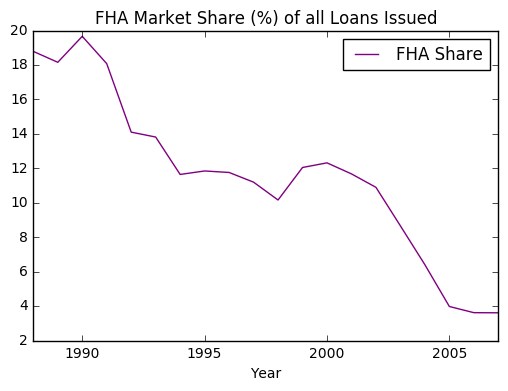

In [252]:
fha.plot(x='Year',y='FHA Share', legend='best',
        kind='line',                 # line plot
        color='purple',   # line color
        title='FHA Market Share (%) of all Loans Issued')

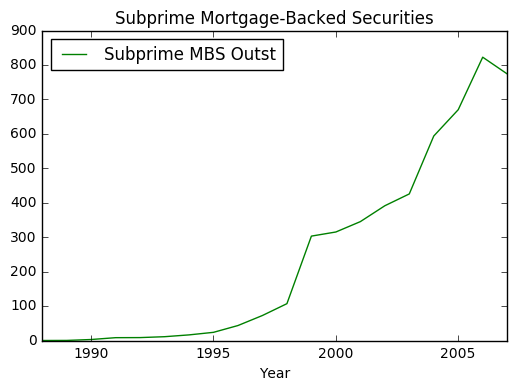

In [251]:
fha.plot(x='Year',y='Subprime MBS Outst', legend='best',
        kind='line',                 # line plot
        color='green',   # line color
        title='Subprime Mortgage-Backed Securities')

#### Graphs of Subprime Loan Characteristics
The problem with the trend, was not the growth in securitization. It was, however, the poor quality of the underlying collateral; the mortgages that were being issued to bad borrowers and subsequently securitized a handful of times adding leverage, complexity and risk.

The trend is particulary visible in the following graphs, which show average loan characteristics at issuance during the years leading up to the collapse of the financial system. It should paint a picture of how risky the whole system had become.

In [124]:
loan_info = 'C:/Users/Daniel Lynch/Desktop/Loan Data.xlsx'
loans = df_loans = pd.read_excel(loan_info)

loans.head()

,Year,Prime Default in 12 months,Subprime Default in 12 months,Subprime FICO,Prime FICO,Subprime LTV,Prime LTV,Subprime Interest Rate,Prime Interest Rate,Subprime ARMs,Prime ARMs
0,2004,0.0243,0.1119,617,710,0.7963,0.7592,0.071,0.056,0.7331,0.2645
1,2005,0.0239,0.1622,611,715,0.8069,0.7489,0.075,0.060,0.6949,0.2604
2,2006,0.0433,0.2379,607,708,0.8040,0.7599,0.085,0.067,0.6178,0.2316
3,2007,0.0493,0.2548,597,706,0.8056,0.7775,0.084,0.065,0.3892,0.1293


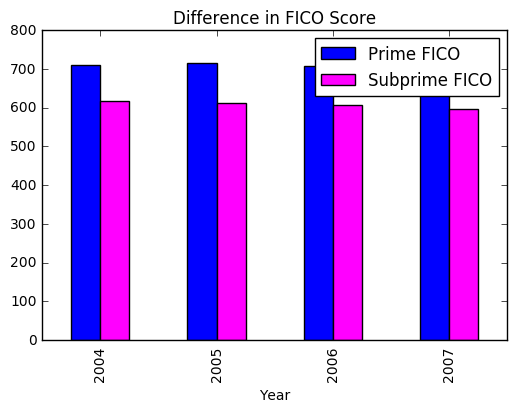

In [196]:
loans.plot(x='Year',y=["Prime FICO","Subprime FICO"], legend='best',
        kind='bar',                 # line plot
        color=['blue', 'magenta'],   # line color
        title='Difference in FICO Score')

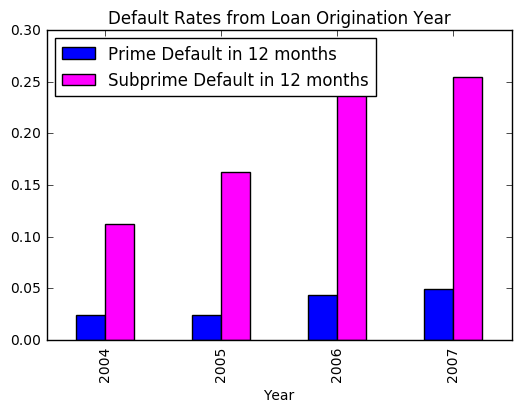

In [145]:
loans.plot(x='Year',y=["Prime Default in 12 months","Subprime Default in 12 months"],
        kind='bar',                 # line plot
        color=['blue', 'magenta'],   # line color
        title='Default Rates from Loan Origination Year')

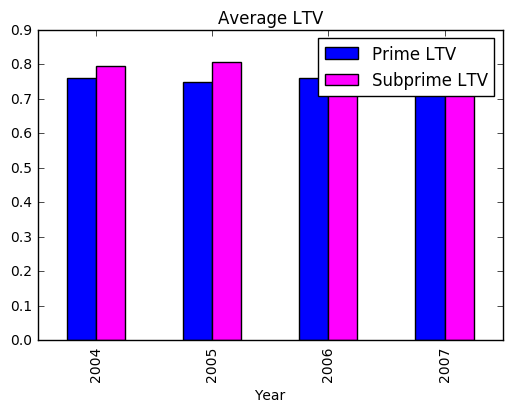

In [192]:
loans.plot(x='Year',y=["Prime LTV","Subprime LTV"], legend='best',
        kind='bar',                 # line plot
        color=['blue', 'magenta'],   # line color
        title='Average LTV')

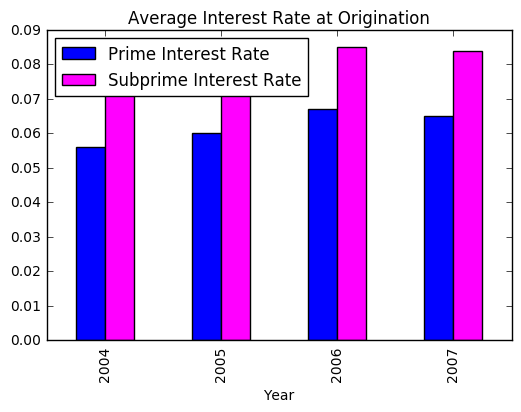

In [164]:
loans.plot(x='Year',y=["Prime Interest Rate","Subprime Interest Rate"],
        kind='bar',                 # line plot
        color=['blue', 'magenta'],   # line color
        title='Average Interest Rate at Origination')

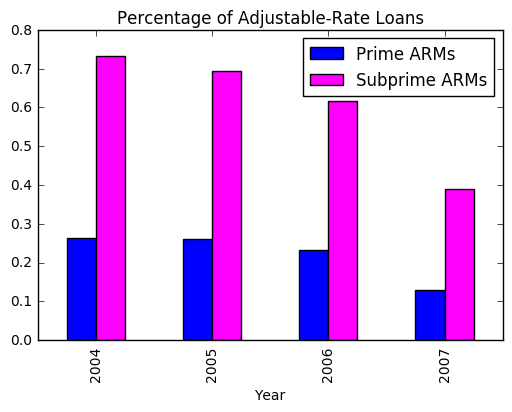

In [199]:
loans.plot(x='Year',y=["Prime ARMs","Subprime ARMs"],
        kind='bar',                 # line plot
        color=['blue', 'magenta'],   # line color
        title='Percentage of Adjustable-Rate Loans')

#### The Deterioration in Loan Quality Pre-Crisis

The FHA has historically had a strong and consistent market share (as a percentage of all houses sold). In 1990, they issued loans for 19.66% of home sales. Only a decade and a half later, in 2006, their share had fallen precipitously to only 3.62% of the market. Where did their market share go? The correlations that I have examined indicate that the decline in FHA market share, could have been influenced by the rise in non-agency or private-label mortgage origination, particularly growth in the non-agency subprime space. 

#### Why did FHA lose market share? Why did it matter?

For now, the thesis is simple. Subprime borrowers, for possibly the first time ever, had a choice of where to go for a mortgage. This choice, and therefore the FHA’s competitor, was a population of private-label mortgage brokers who were growing increasingly willing to lend past Alt-A and further into the subprime and deep subprime category. But why, then, did brokers suddenly become willing to lend to clients that formerly would have had no option other than to qualify for a FHA loan? Why did borrowers decide on a private label mortgage, despite the fact that the FHA offered a lower average interest rate than their non-agency competitors? What effects did this trend have in the derivative market? I believe there to be a few key points which serve to answer these questions:

1.In conjunction with the decline in loan quality came a new stock of housing developments. Subprime mortgage brokers were willing to sell more expensive houses (with more square footage, bedrooms, bathrooms, garage space, etc.) to clients that would have previously been only able to afford a modest home according to FHA conforming loan limits. 

2.Brokers became willing to sell riskier loans (higher LTV) for a few reasons. First, they had no accountability for selling mortgages with high default probability. They were driven by asymmetric information to produce loan volume, not quality.  After they negotiated the interest rate, LTV, ARM margin, or balloon payment higher, they took their fee and never worried about that mortgage again.

3.Mortgage lenders, like New Century and American Home Mortgage, didn’t have to worry about risk from these loans for long; only until they found a buyer (frequently, a private label subprime RMBS issuer). This was an easy task, as the film adaptation of Michael Lewis’ The Big Short references. This secondary demand was large; non-agency subprime RMBS outstanding grew from 185 billion in 1988 to 2.7 trillion in 2007.  This growth was ubiquitous, and even GSEs were guilty.  Although they only insured the safest of their purchases and held only 17 percent subprime loans , when home prices fell these negative amortization, interest only, subprime, and low down-payment assets lead to 50 percent of the firms’ losses . 

4.Another likely explanatory variable in increased demand for low-quality mortgages comes from looking at CDO yield spreads. As the overall volume for CDO originations grew, there was a shortage of decently yielding collateral to fill the tranches. Home equity ABS issuance grew from nearly 0 in the early 1990s to over 500 billion in 2005, while the insured percentage fell from above 80 percent to around 5 percent. More empirically, from 2004 to 2006 SF CDO  issuance surged from around 90 billion nearly 240 billion. As demand surged, managers were willing to pay more in order to acquire assets for their CDOs. This drove down ARM BBB- spreads from 450bps to around 200bps, leading to severely overpriced risk.  


5.Additionally, CDO managers (who ultimately controlled the subprime demand surge from the top-down) were insulated. If the loans were too risky, they could either repackage them into new CDOs, purchase credit enhancement to bring a tranche’s rating back above investment grade, or issue certain tranches of the products as commercial paper. Proxies for measuring these trends could be looking at growth of CDO Squared (and Cubed) volume, and the ever-increasing credit default swap (CDS) business that AIG, among other firms with investment grade ratings, sold as insurance. 

6.The percentage of CDO collateral that was subprime RMBSs grew significantly between 1999-2007, as seen in below in Figure 13. 

7.There was a generally blatant mischaracterization of the risk surrounding leveraged subprime products. A good comparison for readers familiar with corporate bonds, but not non-agency subprime MBS, is between the terms used to describe corporates. Loosely, “subprime” MBS would be analogous to “junk” or high yield. 

8.In speaking about failure of CDO managers to create market-based restraints, Mark Adelson writes, “The failure…was not inevitable. Had there never been a housing bubble or if it had not burst, borrowers might never have gotten into trouble. More pointedly, had the pricing of risk remained in the hands of experienced and knowledgeable players, lenders could have been restrained from making unreasonably risky loans.”  This issue arose, Adelson finds, because they were not incentivized to keep the products safe. Their investors, who were not mortgage experts, were ultimately left risk-exposed despite the assurance from the credit rating agencies as to the investment-grade quality of the securities.  

9.Regarding the last question, I would assert that the answer is relatively straightforward. People were not afraid of the implications of paying a marginally higher interest rate with a private-label broker, because they assumed home prices would keep going up.

10.Lastly, subprime homebuyers, particularly less-educated borrowers from historically underserved and poorer communities, were susceptible to being taken advantage of by subprime brokers. The link between racial segregation and subprime lending was studied by Armstrong et al. from The Furman Center of New York University.   


#### Graphical Display of Decline in FHA, Spreads, CDO Collateral, etc.

Here is a depiction of CDO Collateral becoming gradually more subprime, more risky

In [262]:
collateral = 'C:/Users/Daniel Lynch/Desktop/CDO Collateral.xlsx'
underlying = df_underlying = pd.read_excel(collateral)

underlying.head()

,Year,Subprime,Prime
0,1999,0.00,0.14
1,2000,0.05,0.01
2,2001,0.07,0.06
3,2002,0.16,0.06
4,2003,0.29,0.14


In [264]:
underlying.corr('pearson')

,Year,Subprime,Prime
Year,1.000000,0.935732,0.555738
Subprime,0.935732,1.000000,0.645760
Prime,0.555738,0.645760,1.000000


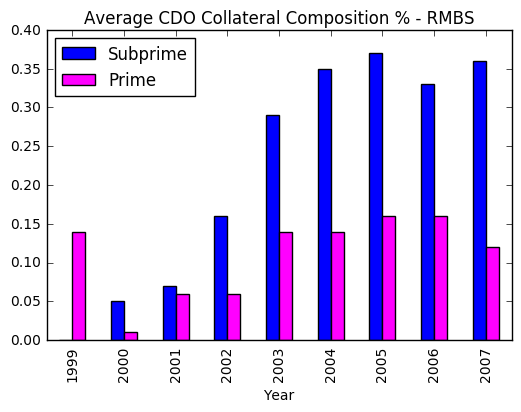

In [268]:
underlying.plot(x='Year',y=['Subprime','Prime'], legend='best',
        kind='bar',                 # line plot
        color=['blue','magenta'],   # line color
        title='Average CDO Collateral Composition % - RMBS')

#### Here is a depiction of the decline in CDO ARM Spreads as Increased Demand Pushed Them Down Leading to Overpriced Risk

In [259]:
cdo_info = 'C:/Users/Daniel Lynch/Desktop/Spreads.xlsx'
spreads = df_spreads = pd.read_excel(cdo_info)

spreads.head()

,Date,Fixed BBB Spread,ARM BBB Spread,ARM BBB- Spread
0,2001-01-18,230.0,185.0,NaN
1,2001-01-25,233.0,190.0,NaN
2,2001-02-01,237.0,195.0,NaN
3,2001-02-08,231.0,195.0,NaN
4,2001-02-15,226.0,195.0,NaN


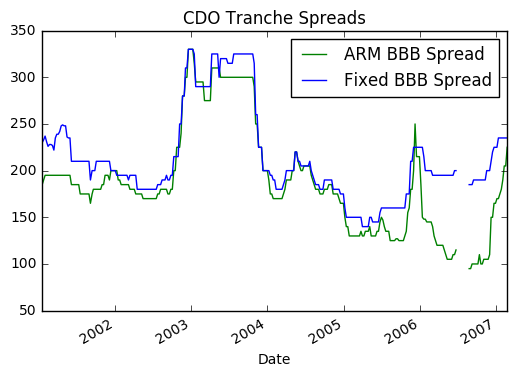

In [260]:
spreads.plot(x='Date',y=['ARM BBB Spread','Fixed BBB Spread'],
        kind='line',                 # line plot
        color=['green','blue'],  # line color
        title='CDO Tranche Spreads')

<h3 align="center">
The Credit Rating Agencies
</h3>

Prime or subprime, jumbo or conforming, ARM or fixed, California or Maine, mortgages of all shapes and sizes were compiled, and the cash-flows sold as debt instruments to investors with different preferences in levels of risk exposure. The credit rating agencies (CRAs)  based their CDO ratings off of the previous ratings of the underlying assets that were given at origination (originally a simple combination of loans and MBS and later other CDO tranches, credit default swaps, and more), plus the bonus of added diversification, despite the increase in complexity. According to Moody’s, the final ratings were “achieved through some alchemy.” These firms had a conflict of interest, as it was a competitive marketplace. They wanted to win deals, and be paid anywhere from 500,000 to rate a CDO to 850,000 or more for a CDO Squared, based on the complexity and deal size. CDO managers would make more money, naturally, by being able to sell products to investors as being rated “safe” by a credit expert.  This lead to them shopping around for the CRA that would be the most generous with a rating.

#### The Role of the CRAs

One possible suggestion for how these low-quality loans were able to be repackaged into RMBS, CDO, etc and hold a final credit rating of AAA comes from the loosening of standards of the CRAs. Moody's, for example, captured a large portion of the booming derivative business.

Perhaps, then, we can proxy the deterioration in loan quality via the growth in Moody's (NYSE: MCO) shareprice or revenue and explore correlations to subprime RMBS issuance and decline in FHA market share.

Moody's Data
Earnings to Subprime
Earnings to FHA

In [188]:
moody_stock = 'C:/Users/Daniel Lynch/Desktop/MCO_PPS.xlsx'
ms = df_ms = pd.read_excel(moody_stock)

ms.head()

,Date,Share Price
0,1994-10-31,7.008574
1,1994-11-01,6.323525
2,1994-12-01,6.587005
3,1995-01-03,5.954653
4,1995-02-01,6.165437


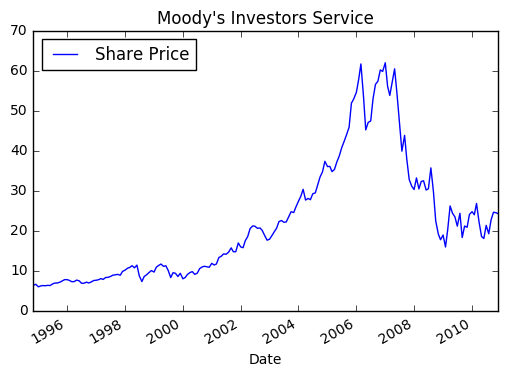

In [191]:
ms.plot(x='Date', title="Moody's Investors Service", legend='best')


In [48]:
mco_stats = 'C:/Users/Daniel Lynch/Desktop/MCO Revenue Stats.xlsx'
stats = df_stats = pd.read_excel(mco_stats)

stats.head()

,Year,Moody's Revenue,MCO Stock,FHA Share,Subprime MBS Outst
0,1996,349.7,7.54,11.76,43.4663
1,1997,423.1,9.80,11.19,72.5923
2,1998,495.5,10.01,10.16,106.9315
3,1999,564.1,9.33,12.05,303.0615
4,2000,602.3,10.85,12.31,315.0227


In [168]:
stats.shape

(12, 5)

In [231]:
stats.corr('pearson')

,Year,Moody's Revenue,MCO Stock,FHA Share,Subprime MBS Outst
Year,1.000000,0.970730,0.845161,-0.868785,0.980154
Moody's Revenue,0.970730,1.000000,0.869464,-0.943793,0.964903
MCO Stock,0.845161,0.869464,1.000000,-0.908497,0.883457
FHA Share,-0.868785,-0.943793,-0.908497,1.000000,-0.877782
Subprime MBS Outst,0.980154,0.964903,0.883457,-0.877782,1.000000


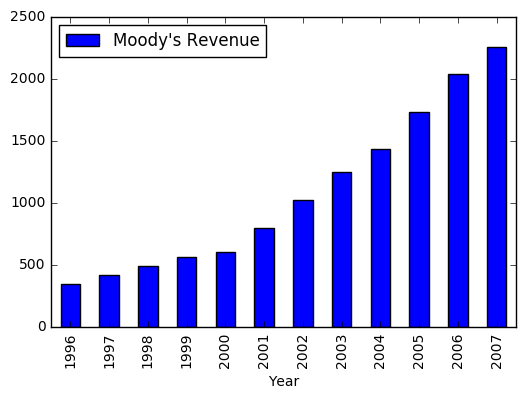

In [109]:
stats.plot(x='Year', y="Moody's Revenue", kind='bar')

#### Correlations

The correlation, during the above timeframe between Moody's Revenue and Subprime RMBS Issuance is 0.965

The correlation between Moody's revenue and FHA Market share is -0.944

<h3 align="center">
Smart Money
</h3>

So far, we've established the following:

1.A bubble in housing prices

2.A deterioration in loan quality 

3.A decline in "safe-loan" market share

4.A possible conflict of interest among the agencies tasked with regulating the safety of the market.


#### So, what's next?

One possible application of this information/data is to... monetize of course! One theory that is compelling enough to dig into is to follow "smart money". In this case, rather than looking at simple inflows/outflows in equities or stock options, there are two metrics to look at what "smart money" on The Street and in the board room is up to.

First, I look at the SPDR XLF ETF, which tracks the financial sector. As you can see from 1998 until the post-collapse era in 2011, the Financial sector appreciated strongly and plummeted as banks came under stress during the CDO disaster.

But, of course, an equity ETF isn't "smart money", so I decided to look at credit default swaps outstanding within the financial sector. The data is weekly, time-series data. Does the flow in CDS purchases indicate that people are particularly bearish or bullish on a sector?

The result of the data analysis is interesting and a little surprising.

**The r-coefficient for XLF Price and Financial Sector CDS Outstanding is -0.92

**For SPY Price and Total CDS Outsanding: -0.98

For various other sector ETFs and sector-specific CDS the results are similar (all within -0.81 and -0.98).

In [220]:
xlf_price = 'C:/Users/Daniel Lynch/Desktop/XLF.xlsx'
xlf = df_xlf = pd.read_excel(xlf_price)
xlf.head()

,Date,Adj Close
0,1998-12-22,13.383527
1,1998-12-28,13.172763
2,1999-01-04,14.015821
3,1999-01-11,13.278145
4,1999-01-19,12.979563


In [22]:
xlf.shape

(944, 2)

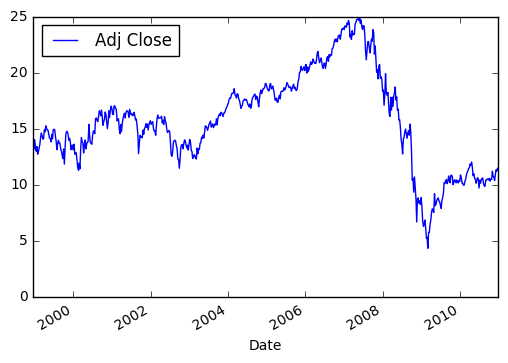

In [221]:
xlf.plot(x='Date')

In [222]:
smart_money = 'C:/Users/Daniel Lynch/Desktop/XLFCDS.xlsx'
sm = df_sm = pd.read_excel(smart_money)

sm.head()

,Date,CDS Outstanding,XLF Price
0,2008-10-31 00:00:00,397.883733,10.688334
1,2008-11-07 00:00:00,344.420890,9.786744
2,2008-11-14 00:00:00,340.613153,8.761269
3,2008-11-21 00:00:00,334.246708,6.662144
4,2008-11-28 00:00:00,334.705999,8.713093


In [230]:
sm.corr('pearson')

,CDS Outstanding,XLF Price
CDS Outstanding,1.000000,-0.930681
XLF Price,-0.930681,1.000000


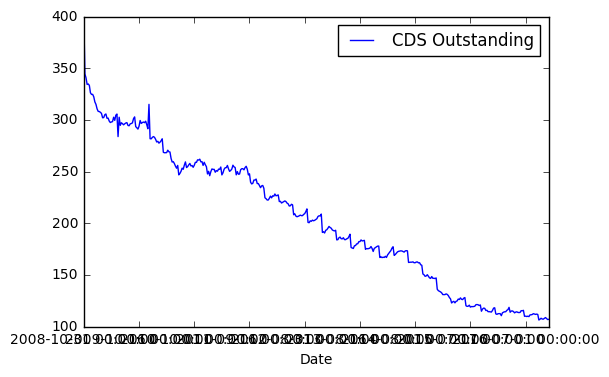

In [223]:
sm.plot(x='Date', y='CDS Outstanding')

#### What else?

A second way to track "smart money" is to see what firm's insiders are up to. 

In the midst of the collapse, massive waves of insider transactions were reported: insiders and upper-level managment even seem to have lost confidence in their firms, and the financial markets as a whole.

Later, you see the buys coming in as bailouts were awarded.

In [20]:
insider_trades = 'C:/Users/Daniel Lynch/Desktop/Insider Trading Data.xlsx'
insider = df_insider = pd.read_excel(insider_trades)
insider.head()

,Type,Transaction,Acceptance,Firm,Ticker,Name,Title,Shares,Stock Price,Transaction Size,Shares Owned After
0,Sell,2007-04-27,2007-05-01 13:54:42,AMERICAN INTERNATIONAL GROUP INC,(AIG),GREENBERG MAURICE R,director officer,6500.0,70.01,455065.0,26914300.0
1,Sell,2007-04-27,2007-05-01 13:54:42,AMERICAN INTERNATIONAL GROUP INC,(AIG),GREENBERG MAURICE R,director officer,100.0,70.04,7004.0,26853900.0
2,Sell,2007-04-27,2007-05-01 13:54:42,AMERICAN INTERNATIONAL GROUP INC,(AIG),GREENBERG MAURICE R,director officer,3700.0,70.07,259259.0,26730000.0
3,Sell,2007-04-27,2007-05-01 13:54:42,AMERICAN INTERNATIONAL GROUP INC,(AIG),GREENBERG MAURICE R,director officer,47300.0,70.10,3315730.0,26676100.0
4,Sell,2007-04-27,2007-05-01 13:54:42,AMERICAN INTERNATIONAL GROUP INC,(AIG),GREENBERG MAURICE R,director officer,16300.0,70.13,1143120.0,26576300.0


In [21]:
insider.shape

(35227, 11)

<h3 align="center">
Conclusion and Policy Recommendations
</h3>

In conclusion to my empirical analysis of the housing bubble, I suggest that there is value in monitoring historically safe asset-prices for drastic moves above fundamental value. Theoretically, this is when financial firms should adjust their behavior in order to decrease risk. However, if this market discipline fails (as in the case of CDO spreads in 2004), defensive action in the form of fiscal or monetary policy, or regulation, “to correct the deficiency is a reasonable solution.”  

For example, if there had been widespread acknowledgement of a housing bubble in 2003, policy could have been enacted approaching the asset as potentially volatile, or more likely to revert downward to the mean. This certainly was not the case; the mortgage machine keep churning until prices finally plummeted from January 2006 until February 2012. The obvious defensive action is a hike in the Federal Funds Rate. However, the Fed is primarily concerned with monitoring the CPI, which does not include home prices. Other policy actions like lowering the conforming loan limit, the maximum allowable LTV, increasing in capital requirements as a lever to slow down lending, or more closely monitoring loan applicants could have prevented hundreds of billions of dollars in write-downs in 2007 and could prevent the next bubble pop, credit crunch, and recession.

My experience in conducting this research, both by reading literature and being lucky enough to speak with industry professionals, has broadened my knowledge of the mortgage-backed security business, and the wider structured product market. Writing this paper has allowed me to create an analytical process as well as a list of informational resources that will push me to continue researching trends in different sectors, markets, and products. For future research, I will likely keep studying asset bubbles. Perhaps because my first exposure to a bubble-pop was from Michael Lewis’ entertaining novel, The Big Short, or because of the legendary “top callers” like John Paulson, I find bubbles to be interesting. That said, they are obviously much easier to recognize after the fact. 

In recent months, I have been passively watching trends in certain capital markets, that could become bubbles.  Interest rates (and, accordingly, the cost of capital for U.S. firms) have been extremely low since the collapse of the financial markets. Investors have been starved for fixed income yield  and moved into public equity markets, driving up multiples. I have been watching the following markets: Toronto home prices, Australian home prices, U.S. used auto loans, and student loans. 


<h3 align="center">
Bibliography
</h3>

2015, © Freddie Mac, and Freddie Mac - Single Family Loan-Level Datase. Single Family Loan-Level Dataset Summary Statistics (n.d.): n. pag. Summary Statistics. Freddie Mac. Web. <http://www.freddiemac.com/news/finance/pdf/summary_statistics.pdf>.

Adelson, Mark. "Advice." Telephone interview. May 2017.

Adelson, Mark, and David Jacob. "The Sub-Prime Problem: Causes and Lesson." (2008): n. pag. Adelsonandjacob.com. Adelson & Jacob Consulting, LLC. Web. Feb. 2017. <http://www.markadelson.com/pubs/Sub-prime_Problem-Causes_&_Lessons.pdf>.

Adelson, Mark. "Bond Rating Confusion." Fixed Income Research (2006): n. pag. Mark Adelson. Nomura. Web. May 2017. <http://www.markadelson.com/pubs/Bond_Rating_Confusion.pdf>.

Algieri, Bernardina. "House Price Determinants: Fundamentals and Underlying Factors." SpringerLink. Palgrave Macmillan UK, 09 May 2013. Web. May 2017. <https://link.springer.com/article/10.1057/ces.2013.3>.

Barnett-Hart, Anna-Katherine. "The Story of the CDO Market Meltdown: An Empirical Analysis." Thesis. Cambridge, MA, 2009. Harvard College. Web. 2017. <https://www.hks.harvard.edu/m-rcbg/students/dunlop/2009-CDOmeltdown.pdf>.

Blum, Michael. "Information." Telephone interview. Apr. 2017.

Cifuentes, Arturo. "Credit Rating Information." Personal interview. May 2017.

"Collateralized Debt Obligation." Wikipedia. N.p., Apr. 2017. Web. May 2017. <https://en.wikipedia.org/wiki/Collateralized_debt_obligation>.

Cordell, Larry, Yilin Huang, and Meredith Williams. Collateral Damage: Sizing and Addressing the Subprime CDO Crisis. Working paper no. 11-30/R. Federal Reserve Bank of Philadelphia, May 2012. Web. <https://www.philadelphiafed.org/-/media/research-and-data/publications/working-papers/2011/wp11-30.pdf>.

Corsini, Kenneth Richard. "Statistical Analysis of Residential Housing Prices." Thesis. GA, 2009. Georgia Institute of Technology. Web. <https://smartech.gatech.edu/bitstream/handle/1853/31763/Corsini_Kenneth_R_200912_mast.pdf>.

Cowan, Cameron L. History and Overview of Securitization. Rep. N.p.: United States House of Representatives, 2003. American Securitization Forum. Web. <https://financialservices.house.gov/media/pdf/110503cc.pdf>.

"Economic Data." FRED. Federal Reserve Bank of St. Louis, n.d. Web. May 2017. <https://fred.stlouisfed.org/>.
The Financial Crisis Inquiry Report: Final Report of the National Commission on the Causes of the Financial and Economic Crisis in the United States. Washington (D.C.): Government Printing Office, 2011. FCIC. Web. Jan. 2017. <https://www.gpo.gov/fdsys/pkg/GPO-FCIC/pdf/GPO-FCIC.pdf>.

"Ginnie Mae Disclosure Data Search." Disclosure Data Search. Ginnie Mae, n.d. Web. May 2017. <https://www.ginniemae.gov/investors/investor_search_tools/Pages/default.aspx>.

Gorton, Gary B. The Panic of 2007. Working paper no. 14358. NBER, n.d. Web. <http://www.nber.org/papers/w14358>.

Guide, Global Property. "What-explains-house-prices?" Global Property Guide. N.p., n.d. Web. May 2017. <http://www.globalpropertyguide.com/real-estate-school/What-explains-house-prices>.

Gujarati, Damodar N., Sangeetha Gunasekar, and Dawn C. Porter. Basic Econometrics. Fifth ed. India: McGraw-Hill Education (India), 2009. Print.

"HMDA Data." FFIEC Home Page. N.p., n.d. Web. May 2017. <https://www.ffiec.gov/>.

Hubbard, R. Glenn, and Anthony Patrick O'Brien. Money, Banking, and the Financial System. Second ed. Boston: Pearson, 2014. Print.

Insuring More Than 40 Million Mortgages Since 1934, and Help For America'sHomeowners. HUD/U.S. N.p., n.d. Web. May 2017. <https://portal.hud.gov/hudportal/documents/huddoc?id=DOC_16677.pdf>.

Investopedia. N.p., n.d. Web. May 2017. <http://www.investopedia.com/>.

Isidore, Chris. "America's Lost Trillions in Household Wealth." CNN Money. Cable News Network, 09 June 2011. Web. May 2017. <http://money.cnn.com/2011/06/09/news/economy/household_wealth/>.

Lansing, Kevin. "Projecting the Long-Run Natural Rate of Interest." Economic Papers. Federal Reserve Bank of San Francisco, 29 Aug. 2016. Web. May 2017. <http://www.frbsf.org/economic-research/publications/economic-letter/2016/august/projecting-long-run-natural-rate-of-interest/>.

Mayer, Christopher, and R. Glenn Hubbard. "House Prices, Interest Rates, and the Mortgage Meltdown." Thesis. Columbia Business School, 2008. Columbia Business School / NBER. Web. <http://www8.gsb.columbia.edu/rtfiles/realestate/Mayer-Hubbard-BEP-10-2008-v7.pdf>.

"The Modern Financial DataResearch Platform." YCharts. N.p., n.d. Web. May 2017. <https://ycharts.com/>.

"Mortgage-backed Security." Wikipedia. N.p., 25 Apr. 2017. Web. May 2017. <https://en.wikipedia.org/wiki/Mortgage-backed_security>.

Mui, Ylan Q. "Americans Saw Wealth Plummet 40 percent from 2007 to 2010, Federal Reserve Says." The Washington Post. WP Company, 11 June 2012. Web. May 2017. <https://www.washingtonpost.com/business/economy/fed-americans-wealth-dropped-40-percent/2012/06/11/gJQAlIsCVV_story.html?utm_term=.9dfae1b97a4d>.

Multpl. Financial and Economic Stats. N.p., n.d. Web. May 2017. <http://www.multpl.com/>.

Report to Congressional Requesters. Washington, D.C.: GAO, 2007. Federal Housing Administration. Government Accountability Office. Web. <http://www.gao.gov/new.items/d07645.pdf>.

Social Benefits of Homeownership and Stable Housing (2012): n. pag. NAR Report. National Association of Realtors. Web. <https://www.nar.realtor/sites/default/files/social-benefits-of-stable-housing-2012-04.pdf>.

"Stanford Rock Center." CDO Library: Financial Crisis Inquiry Commission. Stanford University, n.d. Web. May 2017. <https://fcic.law.stanford.edu/resource/staff-data-projects/cdo-Library>.

Tuckman, Bruce. Fixed Income Securities: Tools for Today's Markets, 2nd Edition. N.p.: John Wiley & Sons, 2002. Print.

"World Bank Open Data." Data. The World Bank, n.d. Web. May 2017. <http://data.worldbank.org/>.

An, Xudong, Yongheng Deng, and Anthony B. Sanders. "Subordination Levels In Structured Finance." Thesis. 2006. USC. Web. Apr. 2017. <https://lusk.usc.edu/sites/default/files/workingpapers/wp_2006-1012.pdf>.


<h3 align="center">
Dictionary
</h3>

ABCP - ABCP, or asset-backed commercial paper, is a (very) short term debt instrument (usually contracts expire in a fiscal quarter or less), but typically firms trade them much more frequently (like overnight just to balance a client’s book). ABCP are backed by an asset, like a receivable, and can be secured by a bank based on interest rate. During the high point of the CDO boom, banks that would have originally held bottom-tier CDO or synthetic CDO tranches on their book for yield began to hold AAA tranches and issue them continuously as ABCP. On the opposite side of the trade would be firms that needed a short-term funding but preferred paper for liquidity reserves, coverage ratios, or other financing needs over borrowing in the Repo market. CDO CP came with higher risk; if a minor credit event occurred, the effect would be magnified down the securitization, ultimately leading to evaporated market demand for this product. 

ABS - Asset-backed security

ARM - Adjustable-rate mortgage, which was typically a feature included in riskier loans. Whether to win initial business by promising an immediate interest rate lower than competitors, or to make more interest for their lenders later when the rate adjustment took place, mortgage lenders sold ARMs to nearly 75% of subprime borrowers in 2004. 
Bubble	According to Investopedia, “A bubble is an economic cycle characterized by rapid escalation of asset prices followed by a contraction. It is created by a surge in asset prices unwarranted by the fundamentals of the asset and driven by exuberant market behavior. When no more investors are willing to buy at the elevated price, a massive selloff occurs, causing the bubble to deflate.”

CDO - Collateralized debt obligation

CDO-Squared - Initively, it is a CDO that is backed by previously securitized and rated CDO tranches. It serves as an exit to credit risk that is held on your book from other CDOs. This trend continues with more iterations of securitization (i.e. CDO Cubed).

Conflict of interest -Conflicts of interest were plentiful during the time leading up to the financial collapse. Prominently, economists discuss the presence and role of asymmetrical information (manifesting primarily in “adverse selection” and “moral hazard”) in CRAs, CDO and Hedge Fund managers, mortgage brokers, home buyers, the GSEs… nearly everyone! Ms. Barnett-Hart in The Story of the CDO Meltdown (2009), as well as Hubbard, O’Brien (2014) provide thorough and illustrative explanations.

CRAs - 	Credit rating agency. In this paper, I mention the three most prevalent and important firms are S&P, Fitch, and Moody’s. 

Default - 	The inability to meet scheduled loan payments. Situationally, it would occur after a homeowner stops paying the mortgage and has entered a period of delinquency. The bank would then seize the collateral, the home. 

Derivative - 	According to Investopedia, “A derivative is a security with a price that is dependent upon or derived from one or more underlying assets. The derivative itself is a contract between two or more parties based upon the asset or assets. Its value is determined by fluctuations in the underlying asset.”

FHA -	Federal Housing Administration

FICO Score -	Credit score, widely used in evaluating potential private borrowers and as a determinant for interest rate offered. 

Fixed Rate - 	In this paper, the term is used to describe a characteristic of mortgages that linearly amortize interest and outstanding principal through consistent and pre-determined monthly payments. Typically included in more secure lending where the borrower has a better-established credit history. More broadly, it applies to any type of debt that has locked interest rate. This could be used in a variety of credit derivatives and can be synthetically added to your balance sheet through the purchase of an interest rate swap. 

HEL -	Home equity loan, which allows home owners to borrow against their equity in their home. Functionally, it trades like a second mortgage, and can be used as collateral for another ABS (lender) or a tax deduction (borrower).

HELOC -	Home equity line of credit, which is essentially a revolver (pre-determined spending limit based on income and FICO) that uses the borrower’s home as collateral. 

HPI - 	Housing Price Index. Here, I use the S&P CoreLogic Case-Shiller U.S. National Home Price NSA Index, or the Real Case-Schiller HPI as my dependent variables. I use the terms HPI, Case-Shiller Index, home prices, housing-prices, etc. interchangeably. 

Leverage -	According to Investopedia, “Leverage is the use of various financial instruments or borrowed capital, such as margin, to increase the potential return of an investment. The amount of debt used to finance a firm's assets. A firm with significantly more debt than equity is considered to be highly leveraged.”

Liquidity - 	An asset is defined as being “liquid” based on the ease with which it can be converted into a transaction-ready form, like cash. Additionally, it is used to describe a market generally based on the amount of volume (i.e.: SPX call options are an extremely liquid security, with plenty of buyers and sellers at most strikes near-the-money). 

Liquidity puts - 	A derivative security originally introduced by Citibank (Citigroup’s national bank subsidiary), which functioned like and other put contract and served as insurance (the right but not obligation to exit a position) to investors in the short-term asset-backed commercial paper market. The market for these products grew after CDO managers and originators decided to issue AAA tranches of CDOs as commercial paper instead of long-term debt, and through the massive growth of the Repo borrowing market. 

LTV -	Loan-to-value ratio

MBS - 	Mortgage-backed security, which can be referred to more specifically based on the type of property used as collateral, either CMBS (commercial) or RMBS (residential). 

Prime - 	The antithesis of the well-defined term below.

Subprime - 	A term applied to mortgages, brokers, lenders, borrowers, and MBSs that references elevated credit risk (e.g. “subprime mortgages were at a much higher risk of default”). A good comparison for readers familiar with corporate bonds is to the terms used to describe those categories. Loosely, “subprime” MBS would be like a “junk” or high yield corporate. Ironic to that analogy, is the fact that many investors, and possibly even the CRAs, did not understand the functional difference in the distribution and skew of default probabilities between corporate bonds and RMBS. There primary difference being the systematic risk posed to mortgage-related securities through a nationwide decline in the HPI. There’s no exact comparison in the corporate bond market. Again, the problem was hiding in plain sight; in the fact that most failed to consider the possibility of a reversion of home price momentum. 

Synthetic CDO - 	A synthetic CDO is a that consists of credit default swaps (CDSs). Synthetic CDOs were a good product for investors or traders who preferred to be short or long funded or unfunded, and with varying degrees of default, convexity, duration, idiosyncratic, or systematic risk based the exposure to the underlying and the hedges put in place. Please see the Appendix C for a detailed diagram of the structure of a synthetic CDO.


#### Fin